Ниже представлен датасет Abba Music Characteristics (Spotify) с сайта https://www.kaggle.com/datasets/thedevastator/abba-music-characteristics-spotify?resource=download. В данном датасете представлена информация насчет самых популярных песен (хитов) шведской группы ABBA на известной платформе Spotify. Все данные реальны. Большая часть данных - числовые значения, которые в дальнейшем будут использованы в ходе работы. 

Датасет включает в се6я следующие атрибуты:

album - название альбома  (String)
track_number - трек-номер песни в альбоме  (Integer)
uri - уникальный идентификатор песни  (String)
acousticness - мера акустики песни  (Float)
danceability - насколько хорошо песня хороша для танцев  (Float)
energy - энергичность песни  (Float)
instrumentalness - инструментальность песни  (Float)
liveness - оригинальность песни  (Float)
loudness - громкость песни  (Float)
speechiness - мера кол-ва текста в песни   (Float)
tempo - темп песни  (Float)
valence - позитивность песни  (Float)
popularity - популярность песни   (Integer)
artist - исполнитель песни   (String)

Вычислим среднее значение, СКО, пропущенные значения, выбросы каждого числового атрибута (кроме трек-номера), а также построим гистограммы распределения:

Среднее значение акустики песен: 0.3232658166666667
Среднее квадратичное значение СКО акустики песен: 0.2518901165367346
Кол-во пропущенных значений: 0
Выбросы: No outliers
Гистограмма:  



Среднее значение танцевальности песен: 0.54142
Среднее квадратичное значение СКО танцевальности песен: 0.1614423641221019
Кол-во пропущенных значений: 0
Выбросы: No outliers
Гистограмма:  



Среднее значение энергичности песен: 0.6470026666666666
Среднее квадратичное значение СКО энергичности песен: 0.19266414160283057
Кол-во пропущенных значений: 0
Выбросы: Outliers exist
Гистограмма:  



Среднее значение инструментальности песен: 0.046206406066666664
Среднее квадратичное значение СКО инструментальности песен: 0.17304963947124416
Кол-во пропущенных значений: 0
Выбросы: Outliers exist
Гистограмма:  



Среднее значение оригинальности песен: 0.27062533333333333
Среднее квадратичное значение СКО оригинальности песен: 0.25318240241287615
Кол-во пропущенных значений: 0
Выбросы: Outliers exist
Гистогр

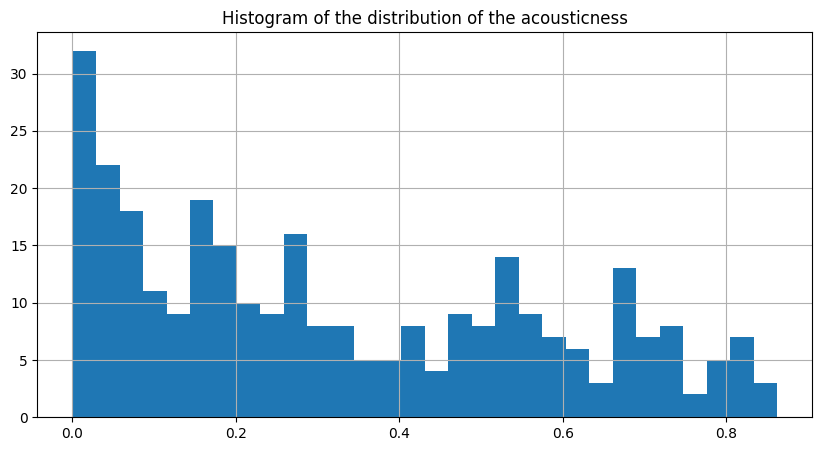

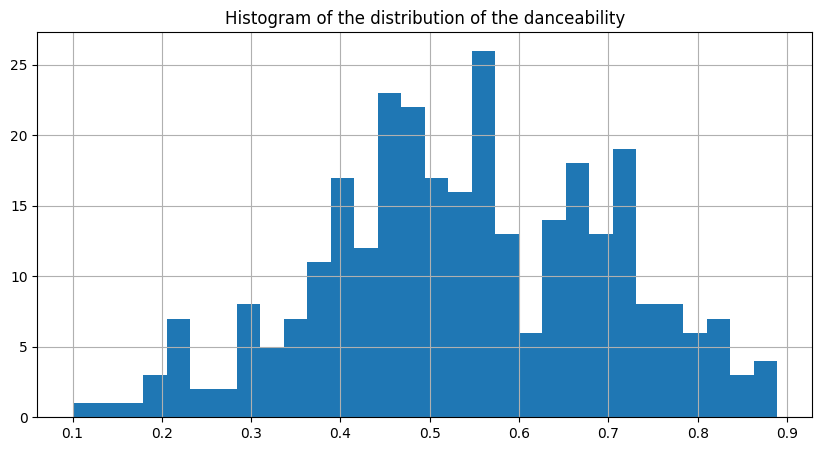

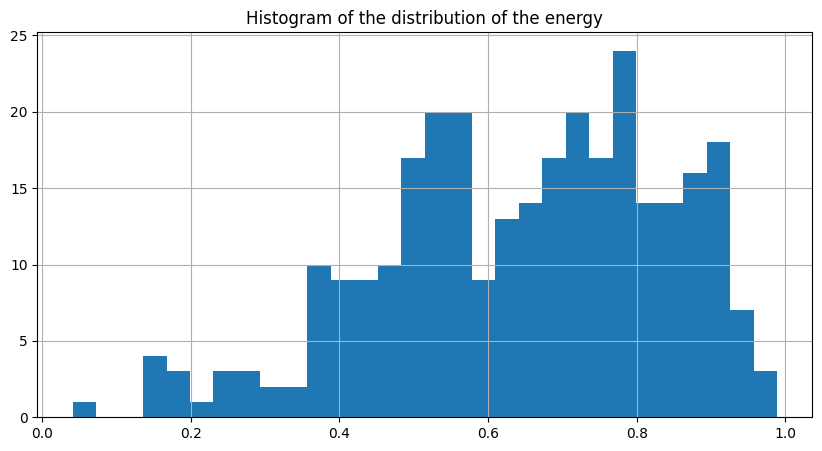

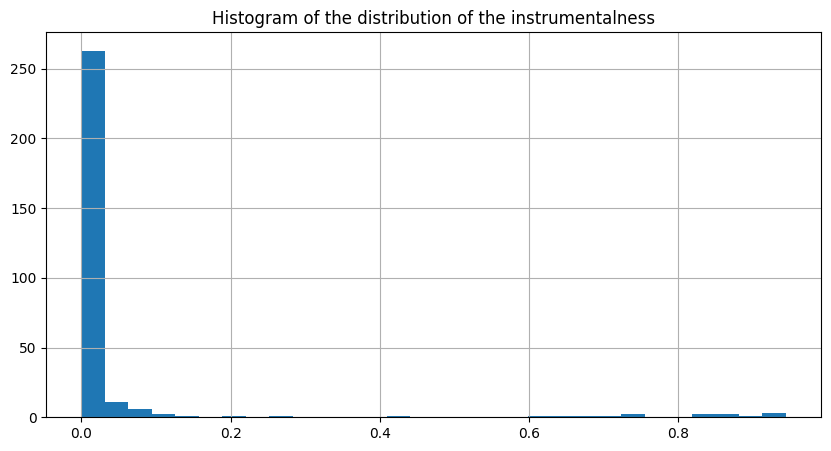

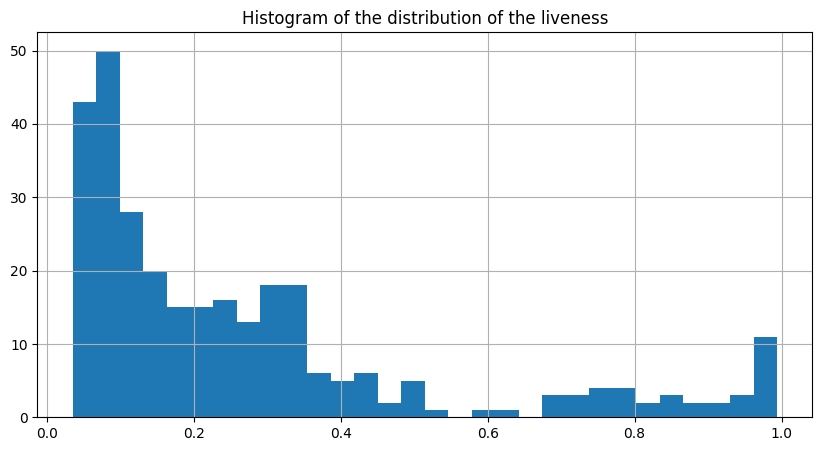

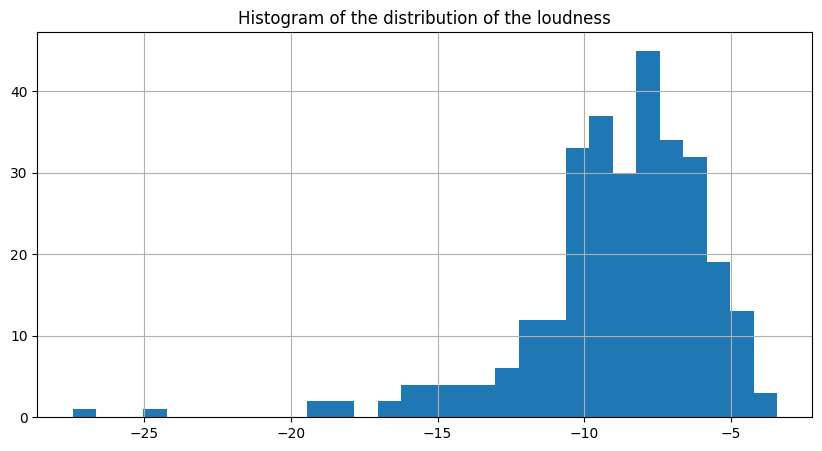

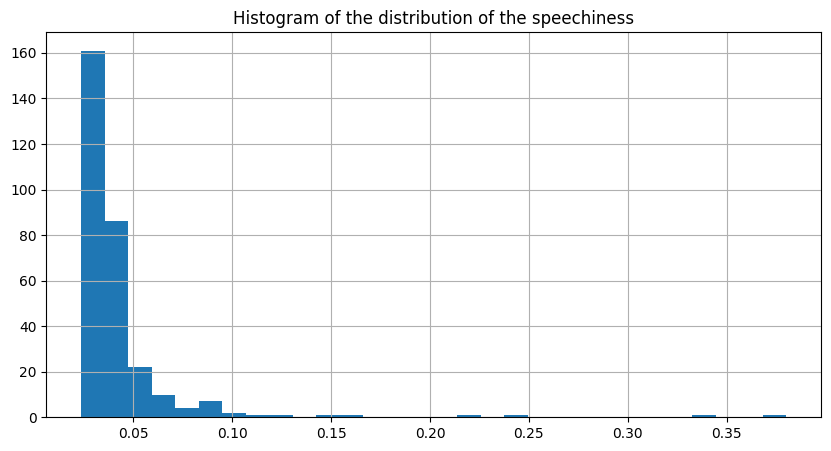

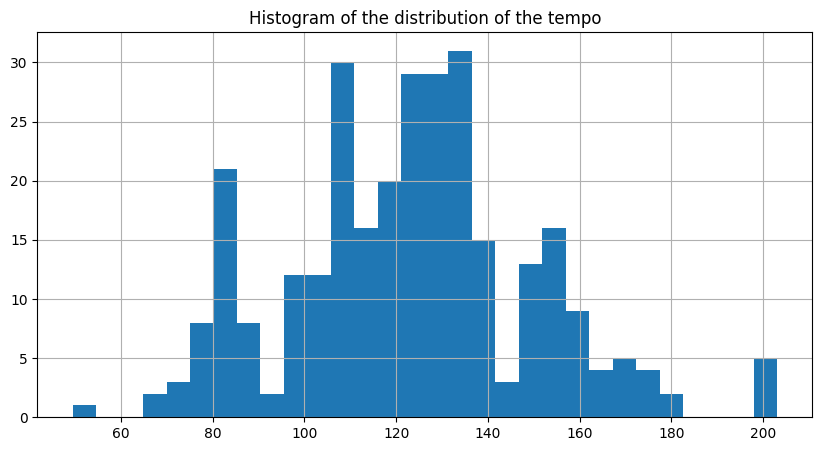

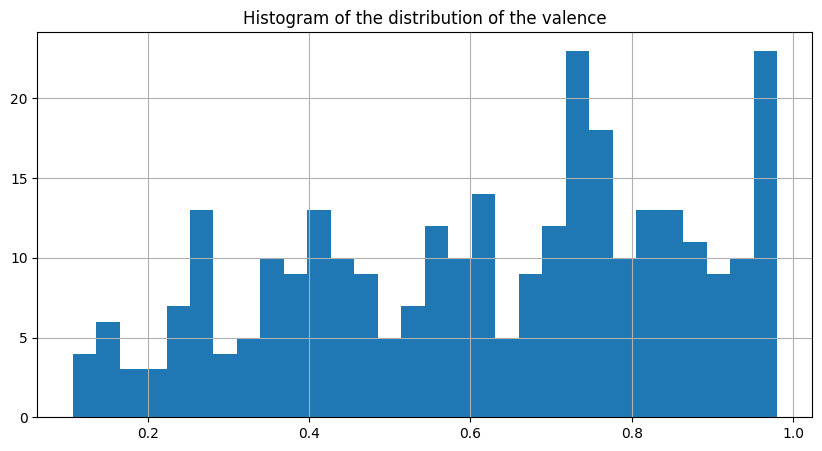

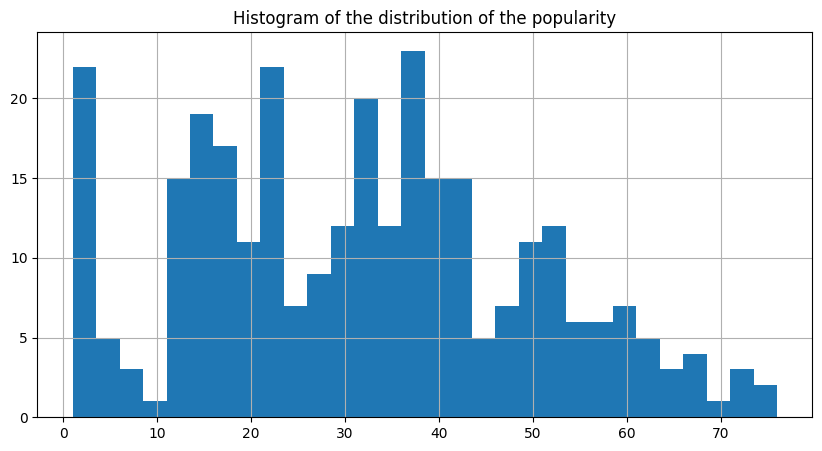

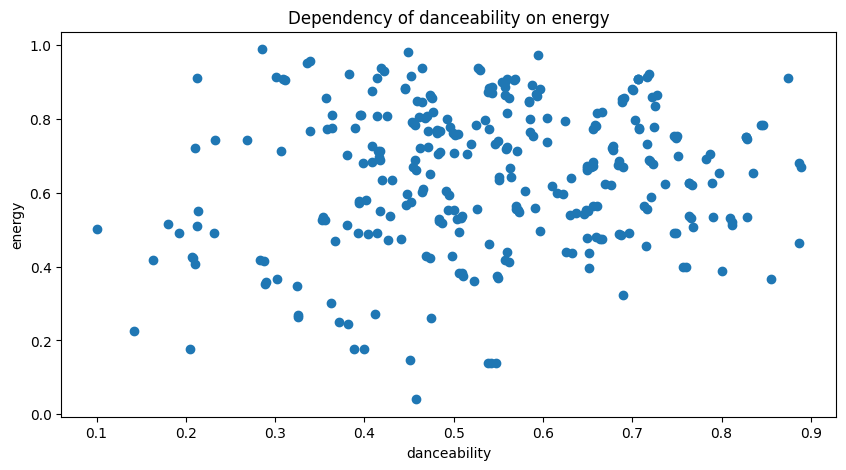

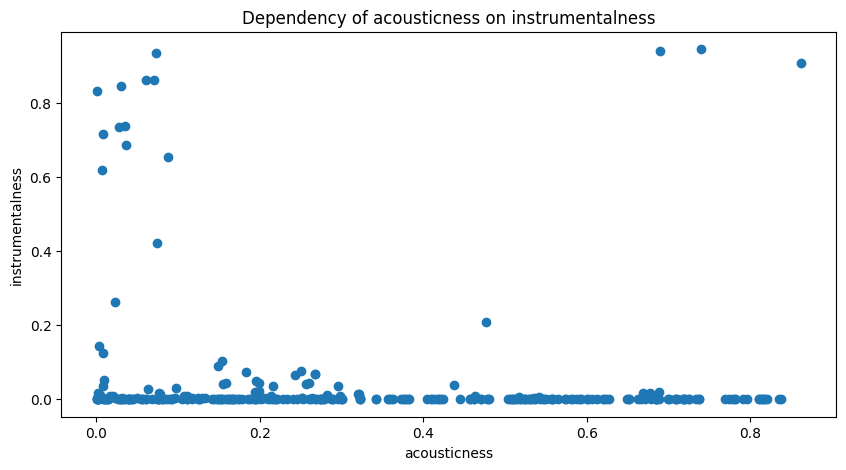

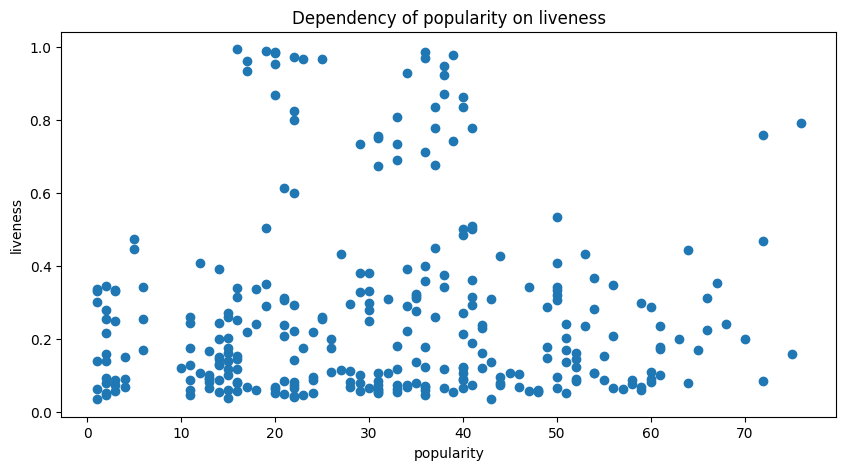

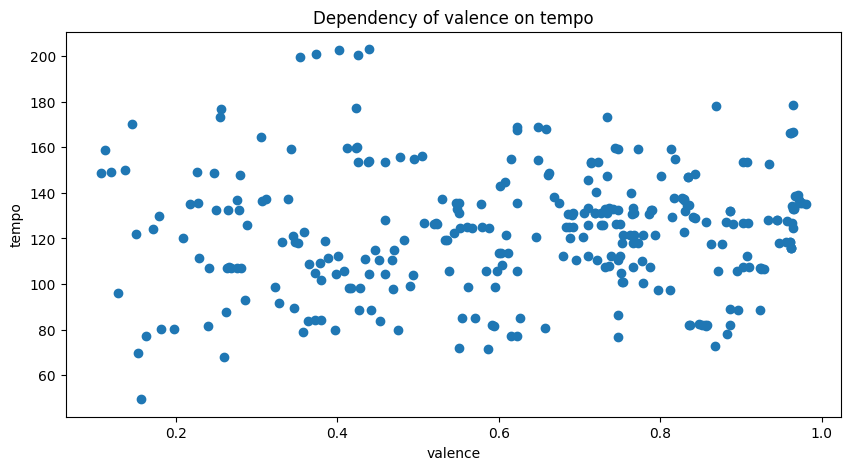

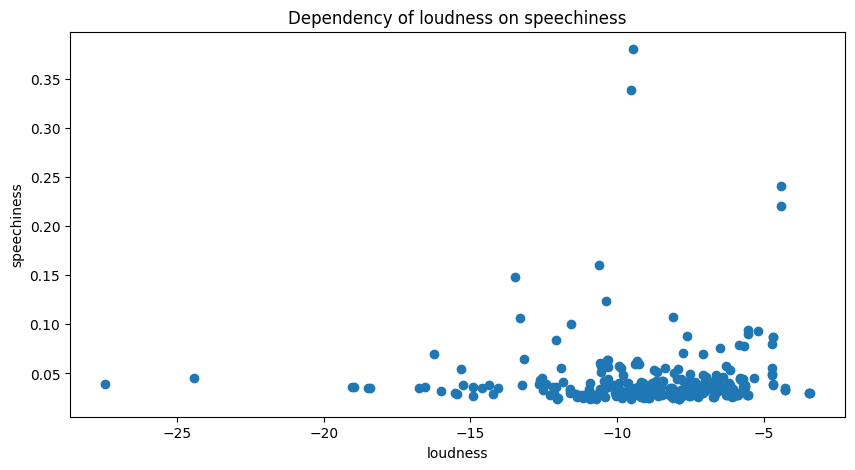

In [23]:
import numpy as np       #импортируем нужные библиотеки
import pandas as pan

import matplotlib.pyplot as plot

db = pan.read_csv('ABBA_Hits_spotify.csv')     #подключаем наш датасет
db.head()

def Outliers(data):      #функция для поиска выбросов
    sorted_arr = np.sort(np.array(db[data]))     #сортируем массив
    
    Q1 = sorted_arr[int(np.ceil(len(sorted_arr) * 0.25))]      #вычисляем нижний квартиль
    Q3 = sorted_arr[int(np.ceil(len(sorted_arr) * 0.75))]      #вычисляем верхний квартиль
    Q2 = Q3 - Q1    #вычисляем межквартильный диапазон

    bottom = Q1 - (1.5 * Q2)      #находим внутренние границы
    top = Q3 + (1.5 * Q2)

    count_outliers = 0    #счетчик выбросов
    for i in range(len(sorted_arr)):         #в цикле вычислем выбросы. Если есть, то увеличиваем счетчик на 1
        if sorted_arr[i] < bottom or sorted_arr[i] > top:
            count_outliers += 1

    if count_outliers == 0:    #если счетчик равен 0, то нет выбросов
        return 'No outliers'
    else:                     #если не равен 0, то выбросы есть
        return 'Outliers exist'


def Average(data):   #функция для поиска среднего значения  (пользуемся внутренней функцией)
    return np.array(db[data]).mean()


def SKO(data):      #функция для поиска СКО  (пользуемся внутренней функцией)
    return np.std(np.array(db[data]))


def Histogram(data):     #функция для отрисовки гистограммы
    plot.figure(figsize=(10, 5))
    plot.hist(db[data], bins=30)
    plot.grid(True)
    plot.title('Histogram of the distribution of the ' + data)


def Missing_values(data):    #функция для поиска пропущенных значений
    return db[data].isna().sum()



print('Среднее значение акустики песен:', Average('acousticness'))
print('Среднее квадратичное значение СКО акустики песен:', SKO('acousticness'))
print('Кол-во пропущенных значений:', Missing_values('acousticness'))
print('Выбросы:', Outliers('acousticness'))
print('Гистограмма:  \n\n\n')
Histogram('acousticness')


print('Среднее значение танцевальности песен:', Average('danceability'))
print('Среднее квадратичное значение СКО танцевальности песен:', SKO('danceability'))
print('Кол-во пропущенных значений:', Missing_values('danceability'))
print('Выбросы:', Outliers('danceability'))
print('Гистограмма:  \n\n\n')
Histogram('danceability')


print('Среднее значение энергичности песен:', Average('energy'))
print('Среднее квадратичное значение СКО энергичности песен:', SKO('energy'))
print('Кол-во пропущенных значений:', Missing_values('energy'))
print('Выбросы:', Outliers('energy'))
print('Гистограмма:  \n\n\n')
Histogram('energy')


print('Среднее значение инструментальности песен:', Average('instrumentalness'))
print('Среднее квадратичное значение СКО инструментальности песен:', SKO('instrumentalness'))
print('Кол-во пропущенных значений:', Missing_values('instrumentalness'))
print('Выбросы:', Outliers('instrumentalness'))
print('Гистограмма:  \n\n\n')
Histogram('instrumentalness')


print('Среднее значение оригинальности песен:', Average('liveness'))
print('Среднее квадратичное значение СКО оригинальности песен:', SKO('liveness'))
print('Кол-во пропущенных значений:', Missing_values('liveness'))
print('Выбросы:', Outliers('liveness'))
print('Гистограмма:  \n\n\n')
Histogram('liveness')


print('Среднее значение громкости песен:', Average('loudness'))
print('Среднее квадратичное значение СКО громкости песен:', SKO('loudness'))
print('Кол-во пропущенных значений:', Missing_values('loudness'))
print('Выбросы:', Outliers('loudness'))
print('Гистограмма:  \n\n\n')
Histogram('loudness')


print('Среднее значение кол-во текста в песнях:', Average('speechiness'))
print('Среднее квадратичное значение СКО кол-ва текста в песнях:', SKO('speechiness'))
print('Кол-во пропущенных значений:', Missing_values('speechiness'))
print('Выбросы:', Outliers('speechiness'))
print('Гистограмма:  \n\n\n')
Histogram('speechiness')


print('Среднее значение темпа песен:', Average('tempo'))
print('Среднее квадратичное значение СКО темпа песен:', SKO('tempo'))
print('Кол-во пропущенных значений:', Missing_values('tempo'))
print('Выбросы:', Outliers('tempo'))
print('Гистограмма:  \n\n\n')
Histogram('tempo')


print('Среднее значение позитивности песен:', Average('valence'))
print('Среднее квадратичное значение СКО позитивности песен:', SKO('valence'))
print('Кол-во пропущенных значений:', Missing_values('valence'))
print('Выбросы:', Outliers('valence'))
print('Гистограмма:  \n\n\n')
Histogram('valence')


print('Среднее значение популярности песен:', Average('popularity'))
print('Среднее квадратичное значение СКО популярности песен:', SKO('popularity'))
print('Кол-во пропущенных значений:', Missing_values('popularity'))
print('Выбросы:', Outliers('popularity'))
print('Гистограмма:  \n\n\n')
Histogram('popularity')


def Dispersion(data_1, data_2):    #функция для отрисовки графика рассеивания
    plot.figure(figsize=(10, 5));
    plot.scatter(db[data_1], db[data_2])
    plot.xlabel(data_1)
    plot.ylabel(data_2)
    plot.title('Dependency of ' + data_1 + ' on ' + data_2)


print('Зависимость танцевальности песен от энергичности: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['danceability']), np.array(db['energy'])))
print('\n\n\n')
Dispersion('danceability', 'energy')


print('Зависимость акустики песен от инструментальности: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['acousticness']), np.array(db['instrumentalness'])))
print('\n\n\n')
Dispersion('acousticness', 'instrumentalness')


print('Зависимость популярности песен от оригинальности: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['popularity']), np.array(db['liveness'])))
print('\n\n\n')
Dispersion('popularity', 'liveness')


print('Зависимость позитивности песен от темпа: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['valence']), np.array(db['tempo'])))
print('\n\n\n')
Dispersion('valence', 'tempo')


print('Зависимость громкости песен от кол-ва текста: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['loudness']), np.array(db['speechiness'])))
print('\n\n\n')
Dispersion('loudness', 'speechiness')